In [837]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras import layers, models

In [838]:
# Read the dataset

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [839]:
# Checking unique values in df

print('Unique Values in Every Column', end='\n-----------------------------\n')

for column in df.columns:
    print(f'{column}: {len(np.unique(df[column]))}')

Unique Values in Every Column
-----------------------------
Pregnancies: 17
Glucose: 136
BloodPressure: 47
SkinThickness: 51
Insulin: 186
BMI: 248
DiabetesPedigreeFunction: 517
Age: 52
Outcome: 2


In [840]:
print(df.dtypes, end='\n****************************************************\n')
print(df.info())


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
****************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age  

In [841]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


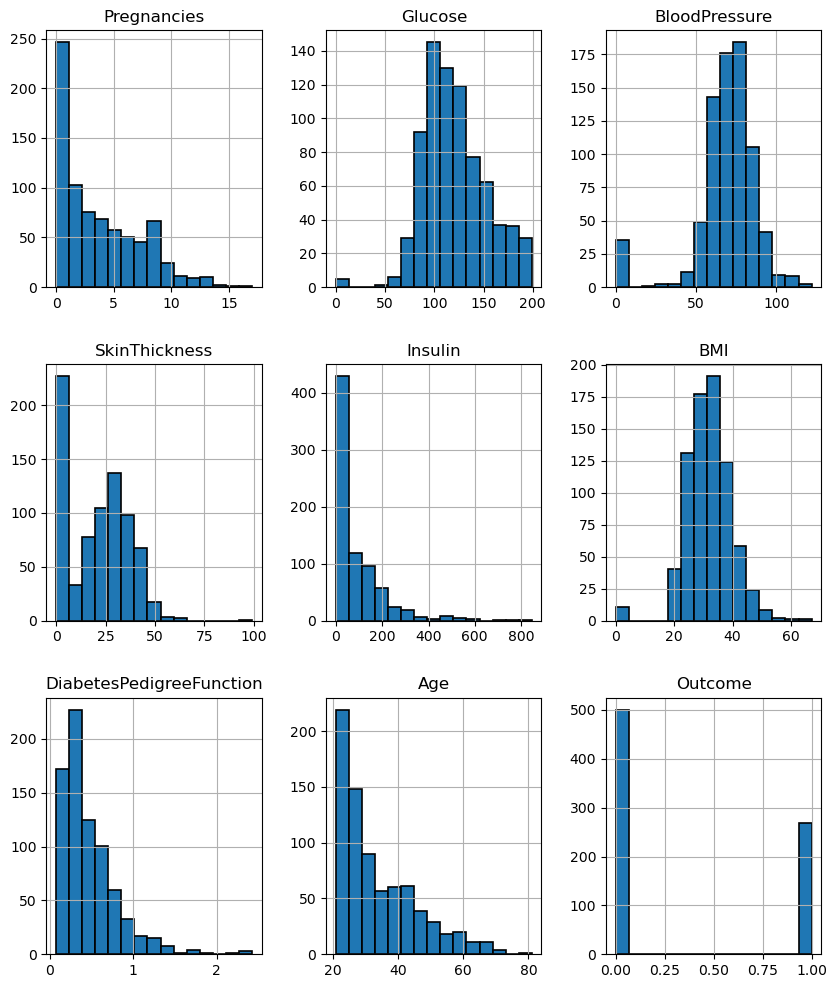

In [842]:
df.hist(figsize=(10, 12), bins=15, edgecolor='black', linewidth=1.2)
#plt.title('Features Distribution')
plt.show()

In [843]:
# Splitting the dataset as X and Y

xSample = df.drop(['Outcome'], axis=1)
ySample = df.Outcome

In [844]:
print(xSample.shape)
print(ySample.shape)

(768, 8)
(768,)


In [845]:
xSample.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [846]:
# Splitting the dataset as train, test, validation

xTrain, xTest, yTrain, yTest = train_test_split(xSample, ySample,
                                                test_size=0.15,
                                                random_state=0)

In [847]:
# Checking the shapes

print(xTrain.shape)
print(yTrain.shape)

print(xTest.shape)
print(yTest.shape)

(652, 8)
(652,)
(116, 8)
(116,)


In [848]:
sc = StandardScaler()

xTrain = sc.fit_transform(xTrain)
xTest = sc.fit_transform(xTest)

In [849]:
xTrain

array([[-0.54921808, -0.3978825 , -0.35995979, ..., -0.85834839,
         1.26393096, -0.95875201],
       [-0.84249424,  2.29516196, -0.97367202, ..., -0.78239248,
         0.57614012, -0.79199029],
       [-0.84249424, -0.30283387,  0.86746466, ..., -0.25070111,
        -0.9820409 , -0.87537115],
       ...,
       [ 0.03733424, -0.84144276, -0.20653173, ..., -0.93430431,
        -0.96682429, -1.04213287],
       [ 2.09026735, -1.12658864,  0.25375243, ..., -0.25070111,
        -0.5042393 ,  0.12519918],
       [ 0.33061039,  0.48923803,  0.66289392, ..., -4.06115598,
         0.53049029,  2.96014843]])

In [850]:
xTest

array([[-8.63739180e-01,  2.24203741e+00,  3.59802611e-01,
         1.42607004e+00, -7.13187482e-01,  1.47193697e+00,
         2.58784195e+00, -9.62407790e-01],
       [-5.42605382e-01, -4.64333277e-01,  2.49386995e-01,
         6.03379290e-01,  2.87293204e-01,  2.71237081e-01,
        -2.99410379e-01, -8.64133756e-01],
       [ 9.96622131e-02, -1.37626253e+00, -4.13106702e-01,
        -1.29513783e+00, -7.13187482e-01,  3.22880087e-01,
        -3.37323794e-01, -6.67585686e-01],
       [ 4.20796011e-01,  1.27127401e+00,  1.38971379e-01,
        -9.27436522e-02,  1.03765372e+00, -7.35801537e-01,
         2.34293839e-01,  1.88753922e+00],
       [-1.18487298e+00, -3.46664986e-01, -2.47483278e-01,
        -1.29513783e+00, -7.13187482e-01, -8.90730555e-01,
         4.47192243e-01, -7.79414760e-02],
       [-8.63739180e-01, -1.22917717e+00,  1.38971379e-01,
        -1.56027556e-01, -3.12995208e-01, -6.32515525e-01,
        -6.52296775e-01, -7.65859721e-01],
       [ 1.70533120e+00,  8.594349

In [851]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(652, 8)
(652,)
(116, 8)
(116,)


In [852]:
model = models.Sequential()


model.add(layers.Dense(86, activation = 'relu', input_dim=8))
model.add(layers.Dense(42, activation='relu'))

model.add(layers.Dense(1, activation = 'sigmoid'))


model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

history = model.fit(
    xTrain, yTrain,
    batch_size=25,
    epochs=100,
    verbose=0
)

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_163 (Dense)           (None, 86)                774       
                                                                 
 dense_164 (Dense)           (None, 42)                3654      
                                                                 
 dense_165 (Dense)           (None, 1)                 43        
                                                                 
Total params: 4,471
Trainable params: 4,471
Non-trainable params: 0
_________________________________________________________________


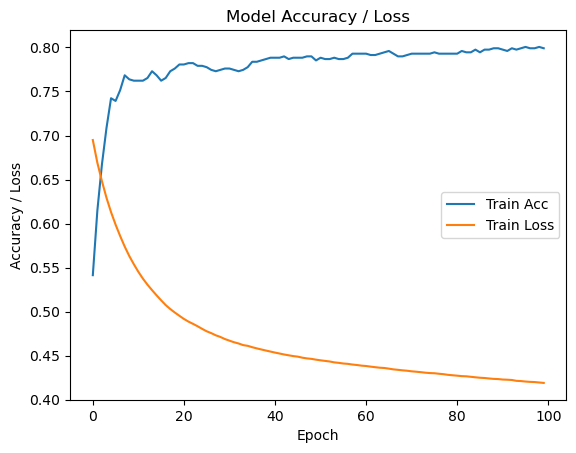

In [853]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy / Loss')
plt.ylabel('Accuracy / Loss')
plt.xlabel('Epoch')

plt.legend(['Train Acc', 'Train Loss'], loc='center right')
plt.show()

In [854]:
score, acc = model.evaluate(xTrain, yTrain,
                            batch_size=10)

print(f'Train Score: {score}')
print(f'Train Accuracy: {acc}')

66/66 [==============================] - 0s 1ms/step - loss: 0.4183 - accuracy: 0.8006
Train Score: 0.4182853400707245
Train Accuracy: 0.800613522529602


In [855]:
# Making predictions and evaluating the model

# Predicting the Test set results
yTestPred = model.predict(xTest)
yTestPred = (yTestPred > 0.5)

score, acc = model.evaluate(xTest, yTest,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

12/12 [==============================] - 0s 1ms/step - loss: 0.4523 - accuracy: 0.8276
Test score: 0.4522643983364105
Test accuracy: 0.8275862336158752


In [858]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

cm = confusion_matrix(yTest, yTestPred)
print(cm)

[[69  9]
 [11 27]]


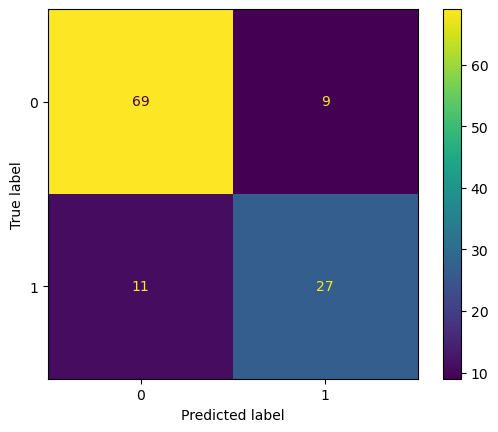

In [859]:
cm_display = metrics.ConfusionMatrixDisplay(cm)
cm_display.plot()

In [861]:
from sklearn.metrics import classification_report

print(classification_report(yTest, yTestPred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        78
           1       0.75      0.71      0.73        38

    accuracy                           0.83       116
   macro avg       0.81      0.80      0.80       116
weighted avg       0.83      0.83      0.83       116

